## Stock Dashboard

Goal: create an interactive Stock dashboard

In [155]:
# imports
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

from matplotlib import gridspec
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'


### Functions

In [167]:
# function to get the desired stock prices
def get_price(ticker, start, end):
    '''
    Function returns the price of the stock from the start to the end date 
    
    INPUT
        ticker: ticker symbol of Stock (e.g.Tesla = 'TSLA')
        start: start date (yyyy-mm-dd) as str 
        end: end data (yyyy-mm-dd) as str
    
    RETURN
        df: pandas DataFrame with Adj Close and Volume
    '''
    df = yf.download(ticker, start, end, progress=False)
    df =df[['Adj Close', 'Volume']]

    return df

In [29]:
def get_rsi(prices, period):
    '''
    Calculates the RSI of a given stock.
    
    INPUT
        prices: pandas DataFrame with stock prices
        period: period of RSI in days
    
    RETURN
        df_rsi: new pandas DataFrame with RSI column
    '''
    # get the price change
    delta = prices['Adj Close'].diff()
   
    # drop first row with NaN    
    delta.dropna(inplace=True)
    
    # create positive and negative gains
    up = delta.copy()
    up[up < 0] = 0
    down = delta.copy()
    down[down > 0] = 0
    
    # Calculate average gaina and loss
    AVG_gain = up.rolling(window=period).mean()
    AVG_loss = abs(down.rolling(window=period).mean())
    
    # Calculate RSI
    RS = AVG_gain / AVG_loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    
    # add to DataFrame
    df_RSI = pd.DataFrame()
    df_RSI = prices 
    df_RSI['RSI'] = RSI
    
    return df_RSI

In [64]:
def get_macd(prices):
    '''
    Calculates the MACD of a given stock
    
    INPUT
        prices: pandas DataFrame with stock prices
    
    RETURN
        df_MACD: new pandas DataFrame with MACD column
    '''
    # calculate 12 day ema
    ema_12 = prices['Adj Close'].ewm(span=12, adjust=False).mean()
    
    # calculate 26 day ema
    ema_26 = prices['Adj Close'].ewm(span=26, adjust=False).mean()
    
    # get MACD
    MACD = ema_12 - ema_26
    
    # calculate signal line
    signal_line = MACD.ewm(span=9, adjust=False).mean()
    
    # add to DataFrame
    df_MACD = pd.DataFrame()
    df_MACD = prices 
    df_MACD['MACD'] = MACD
    df_MACD['MACD_signal'] = signal_line
    
    return df_MACD

In [165]:
# plot stock price
def plot_stock(prices):
    '''
    INPUT
        prices: pandas DataFrame with stock prices
    
    RETURN
        plots stock prices 
    '''
    # set plt style
    plt.style.use('fivethirtyeight')
    
    # drop rows with NaNs in RSI column
    prices.dropna(inplace=True)
    
    # create figute
    fig = plt.figure(figsize=(12,8))
    
    # set hight ratios for subplots
    gs = gridspec.GridSpec(4, 1, height_ratios=[2,1,1,1])
    
    ax1 = plt.subplot(gs[0])
    ax1.plot(prices.index, prices['Adj Close'])
    plt.ylabel('Price')
    ax1.set_title('Tesla Stock Analysis')

    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.bar(prices.index, prices['Volume'])
    plt.ylabel('Volume')
    
    ax3 = plt.subplot(gs[2], sharex = ax1)
    ax3.plot(prices.index, prices['RSI'])
    plt.axhline(30, linestyle='--', lw=1, alpha=0.5, color='red')
    plt.axhline(70, linestyle='--', lw=1, alpha=0.5, color='red')
    plt.ylabel('RSI')
    
    ax4 = plt.subplot(gs[3], sharex = ax1)
    ax4.plot(prices.index, prices['MACD'])
    ax4.plot(prices.index, prices['MACD_signal'])
    
    plt.ylabel('MACD')
    
    # remove xticks
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    
    # code to sace output as picture
    # plt.savefig('Stock_analysis.png', dpi=200, bbox_inches='tight')

In [65]:
tsla_df = get_price('TSLA', '2019-06-06', '2020-06-07')

In [66]:
tsla_df = get_rsi(tsla_df, 14)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [143]:
tsla_df = get_macd(tsla_df)

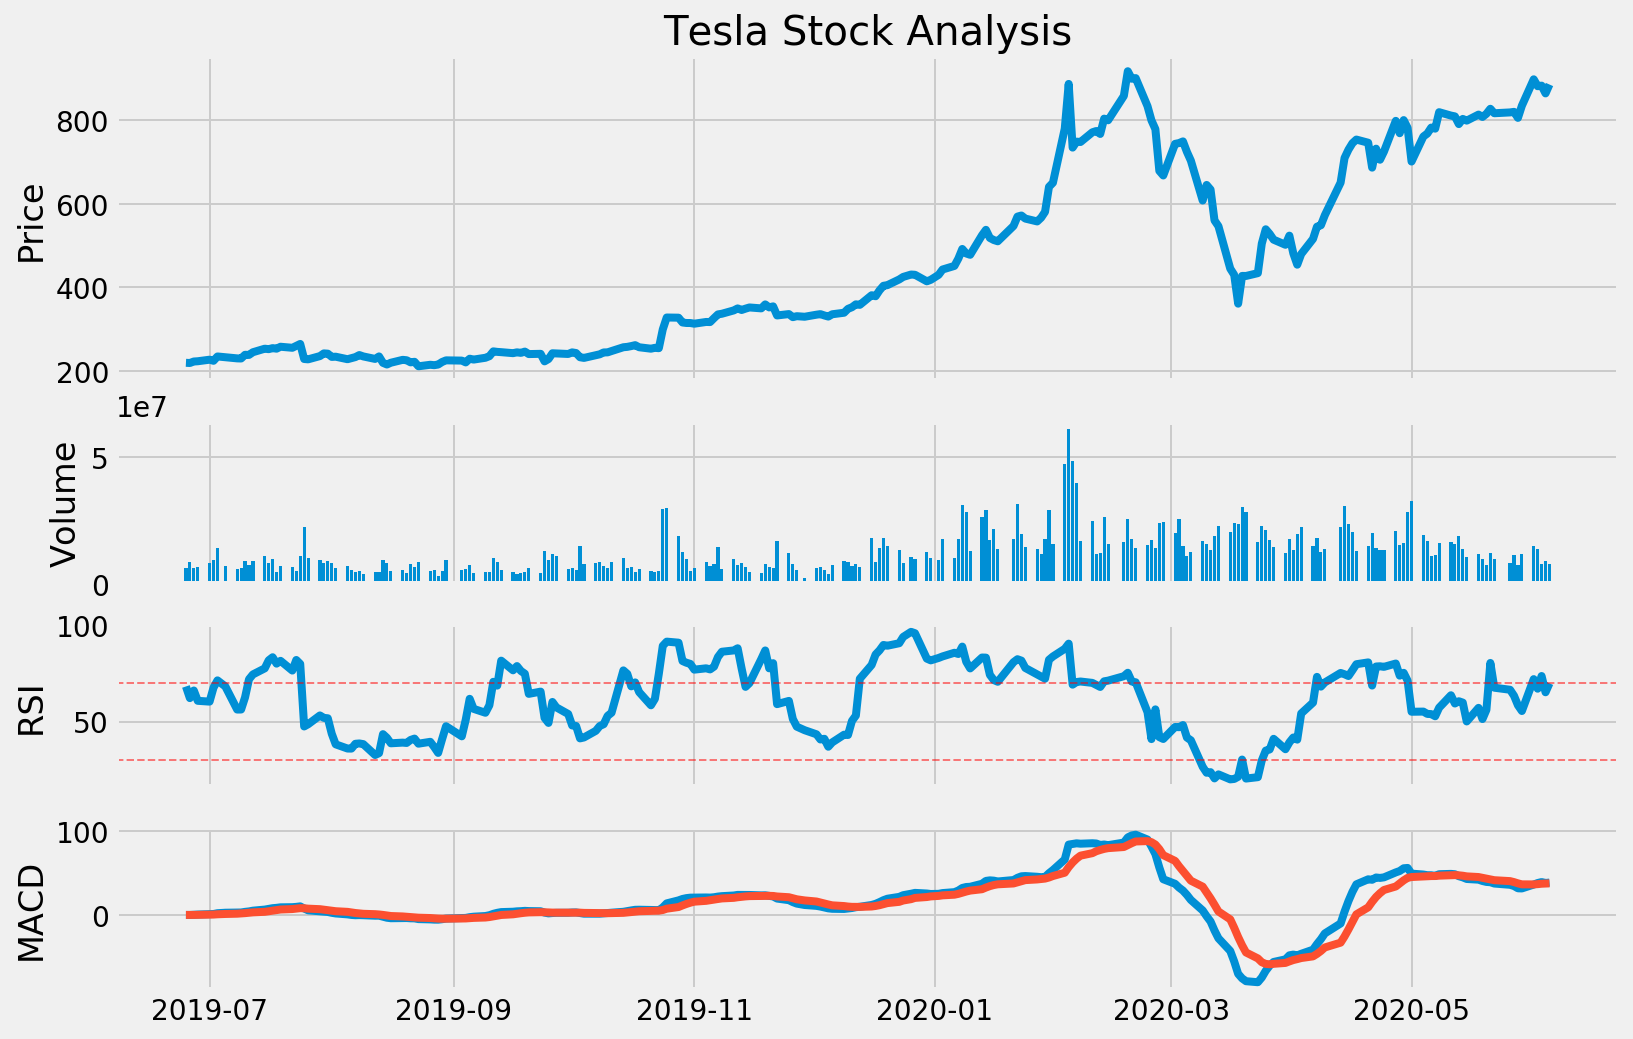

In [166]:
plot_stock(tsla_df)

Resorces:
- https://towardsdatascience.com/implementing-macd-in-python-cc9b2280126a
- https://stackoverflow.com/questions/37737538/merge-matplotlib-subplots-with-shared-x-axis